In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization as viz

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Comparision between various Trend Labeling methods

#### Metrics for modeling one ticker

In [2]:
methods = ['trend_labeling', 'exp_ma', 'sim_ma']

clfs = {}
model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_one_model('GLP', method=method)
    clfs[method] = clf
    model_metrics_df = pd.concat([model_metrics_df, model_metrics], ignore_index=True)

In [3]:
model_metrics_tbl = model_metrics_df.drop(['symbol', 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1)

In [4]:
model_metrics_tbl

,best_cross_val_score,recall,precision,accuracy,run_time,train_test,cum_rtn,annualized_rtn,sharpe_ratio,method
0,0.164938,0.189796,0.177928,0.627739,0.547009,Train,0.000000,0.000000,0.00,trend_labeling
1,0.018767,0.011175,0.058545,0.541132,0.019033,Test,0.013671,0.018321,-0.10,trend_labeling
2,0.323300,0.361451,0.321731,0.758067,0.428452,Train,0.000000,0.000000,0.00,exp_ma
3,0.259112,0.226039,0.303523,0.554546,0.024894,Test,0.052067,0.070217,0.08,exp_ma
4,0.204650,0.291705,0.158342,0.619146,1.157777,Train,0.000000,0.000000,0.00,sim_ma
5,0.313621,0.243264,0.441233,0.659045,0.024151,Test,0.068751,0.092969,0.16,sim_ma


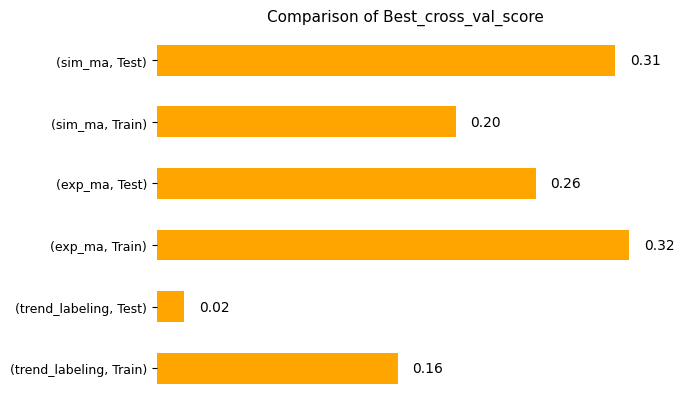

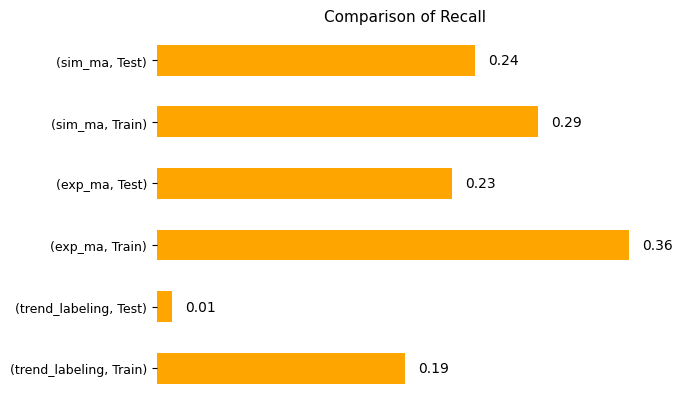

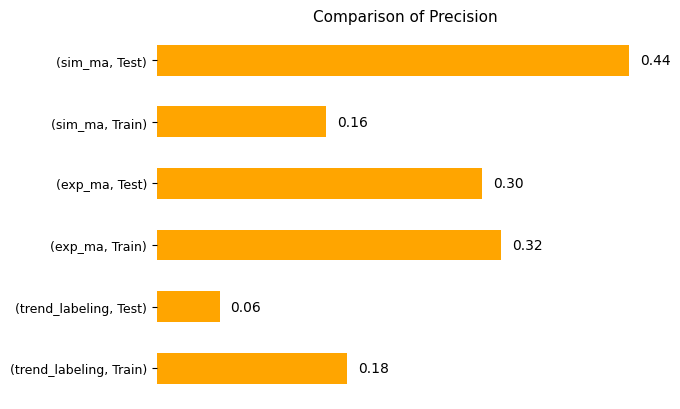

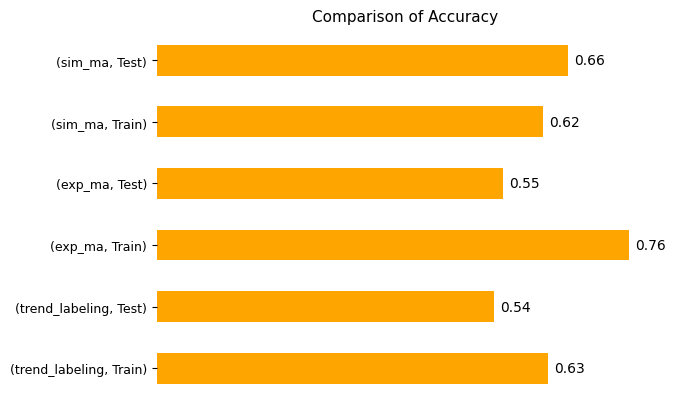

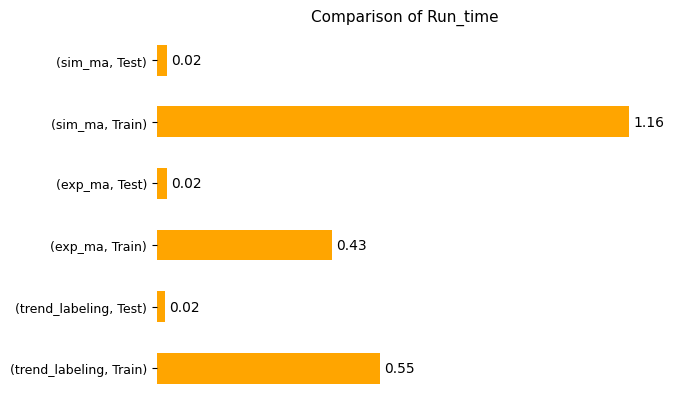

In [5]:
model_metrics_tbl_temp = model_metrics_tbl.set_index(['method', 'train_test'])

viz.plot_model_metrics(model_metrics_tbl_temp[['best_cross_val_score','recall','precision','accuracy','run_time']])


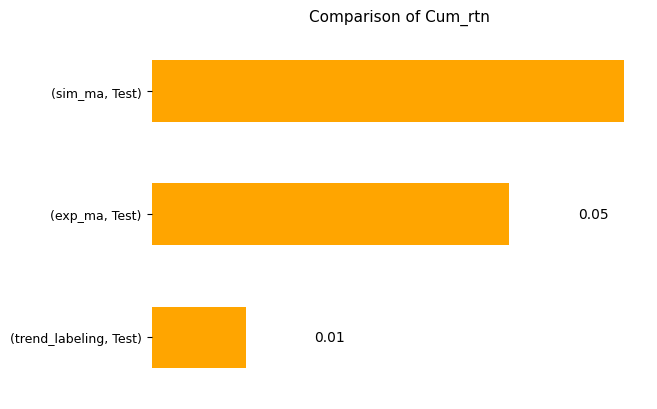

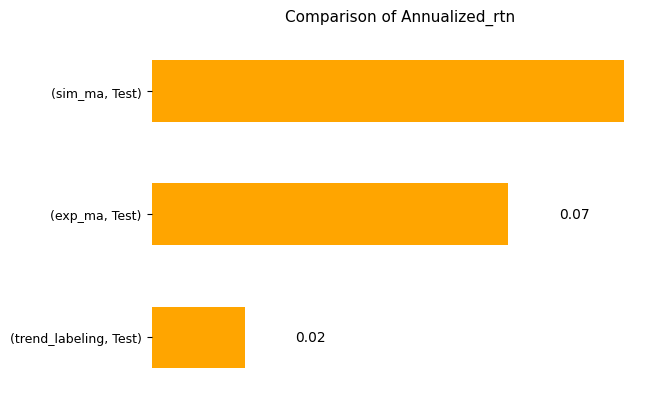

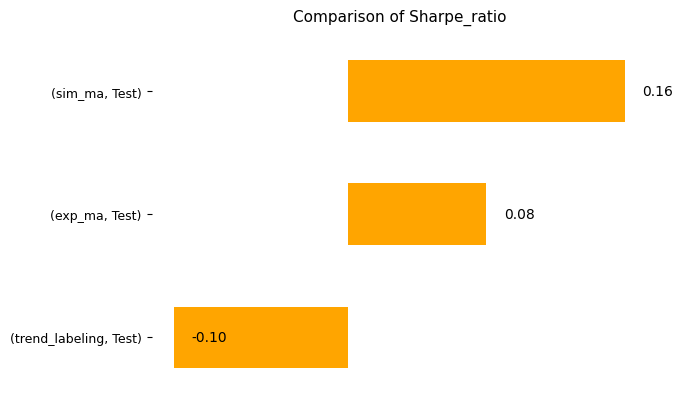

In [6]:
viz.plot_model_metrics(model_metrics_tbl_temp.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

#### Metrics for list of tickers models

In [7]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}'.format(len(tickerlst), lowest_price, highest_price))

There are 22 tickers between $30 and $40


In [8]:
clfs = ['random_forest', 
        'standard_bagging_decision_tree', 
        'sequential_bootstrapping_decision_tree',
        'SVC',
        'sequential_bootstrapping_SVC'
        ]

methods = ['trend_labeling', 
           #'exp_ma', 'sim_ma'
           ]

basket_clfs = {}
basket_model_metrics_df = pd.DataFrame()


for method in methods:
    for c in clfs:
        clf, model_metrics = get_multiple_models(tickerlst, type=c, method=method)
        basket_clfs[method] = clf
        basket_model_metrics_df = pd.concat([basket_model_metrics_df, model_metrics], ignore_index=True)

Processing 1/22 AQNU...
Modeling completed 1/22 AQNU
Processing 2/22 ATEX...
Modeling completed 2/22 ATEX
Processing 3/22 AVID...
Modeling completed 3/22 AVID
Processing 4/22 AVNS...
Modeling completed 4/22 AVNS
Processing 5/22 BROS...
Modeling completed 5/22 BROS
Processing 6/22 CIR...
Modeling completed 6/22 CIR
Processing 7/22 CPSI...
Modeling completed 7/22 CPSI
Processing 8/22 CRTO...
Modeling completed 8/22 CRTO
Processing 9/22 CTR...
Modeling completed 9/22 CTR
Processing 10/22 EGRX...
Modeling completed 10/22 EGRX
Processing 11/22 FDP...
Modeling completed 11/22 FDP
Processing 12/22 FSBW...
Modeling completed 12/22 FSBW
Processing 13/22 GLP...
Modeling completed 13/22 GLP
Processing 14/22 GPRE...
Modeling completed 14/22 GPRE
Processing 15/22 KYMR...
Modeling completed 15/22 KYMR
Processing 16/22 PARAP...
Modeling completed 16/22 PARAP
Processing 17/22 PRCT...
Modeling completed 17/22 PRCT
Processing 18/22 RNST...
Modeling completed 18/22 RNST
Processing 19/22 SCHN...
Modeling 

In [9]:
basket_model_metrics_tbl = basket_model_metrics_df.drop([ 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1).dropna()

In [10]:
basket_model_metrics_tbl = basket_model_metrics_tbl.groupby(['type', 'method', 'train_test'])\
    .agg({'best_cross_val_score': 'mean', 
          'recall': 'mean', 
          'precision': 'mean', 
          'accuracy': 'mean', 
          'run_time': 'mean', 
          'cum_rtn':'mean',
          'annualized_rtn':'mean',
          'sharpe_ratio':'mean',
          'symbol': pd.Series.nunique})

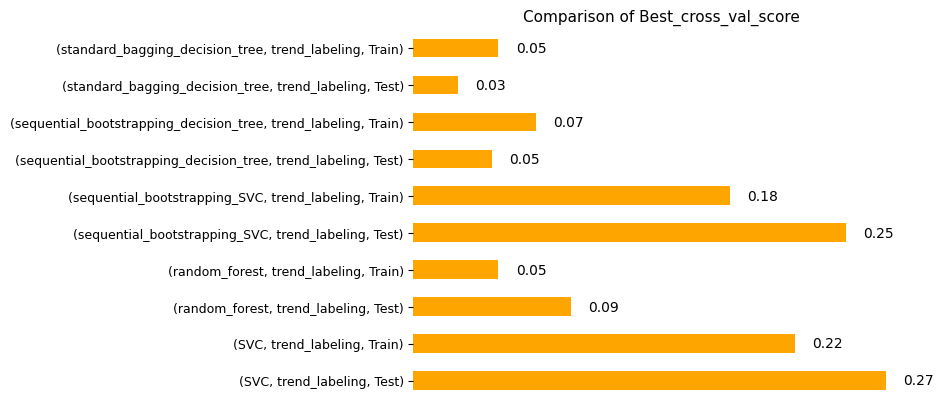

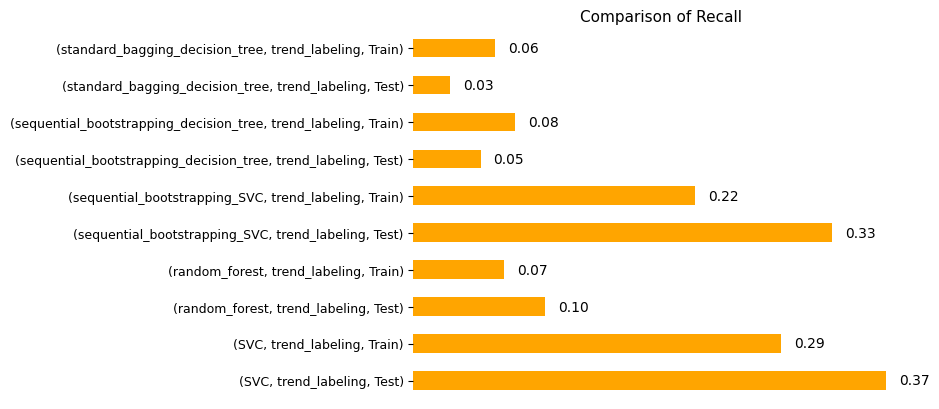

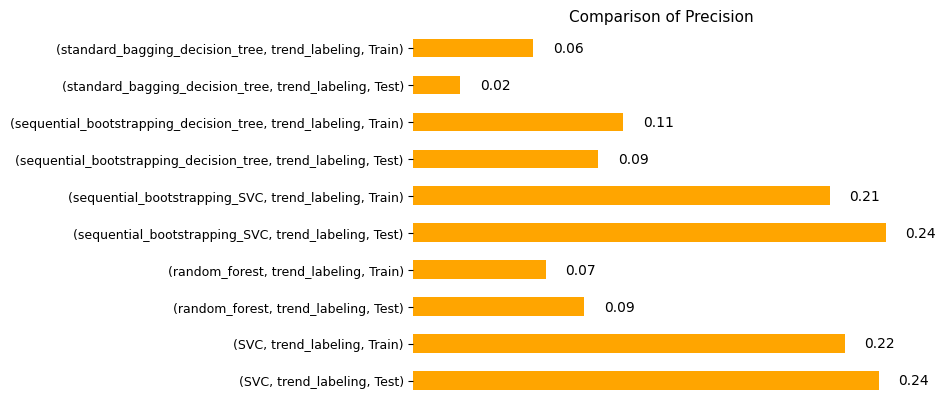

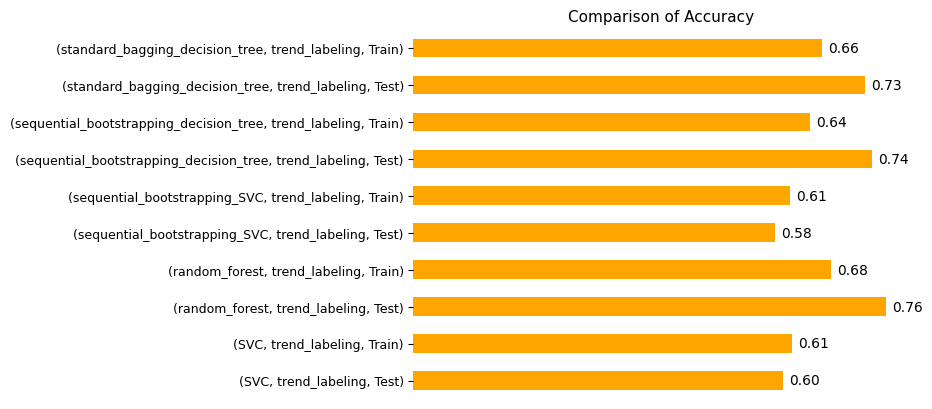

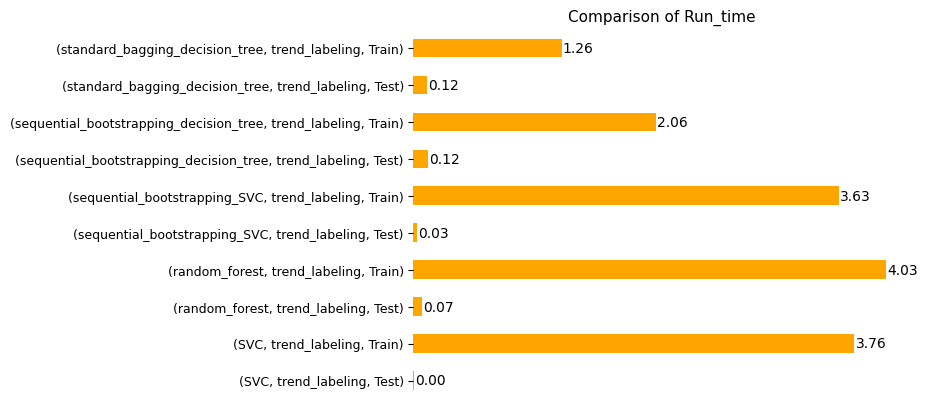

In [11]:
viz.plot_model_metrics(basket_model_metrics_tbl[['best_cross_val_score','recall','precision','accuracy','run_time']])

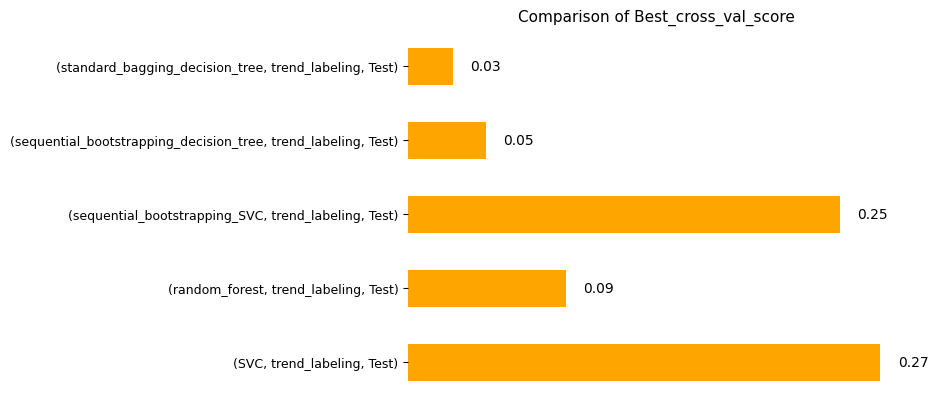

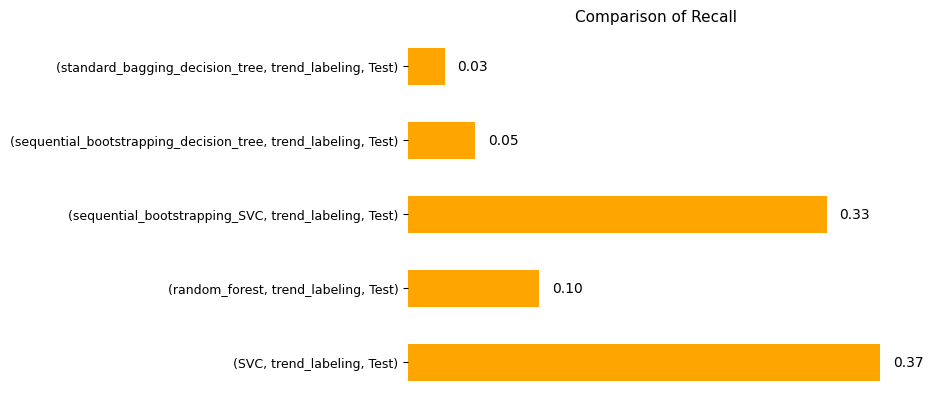

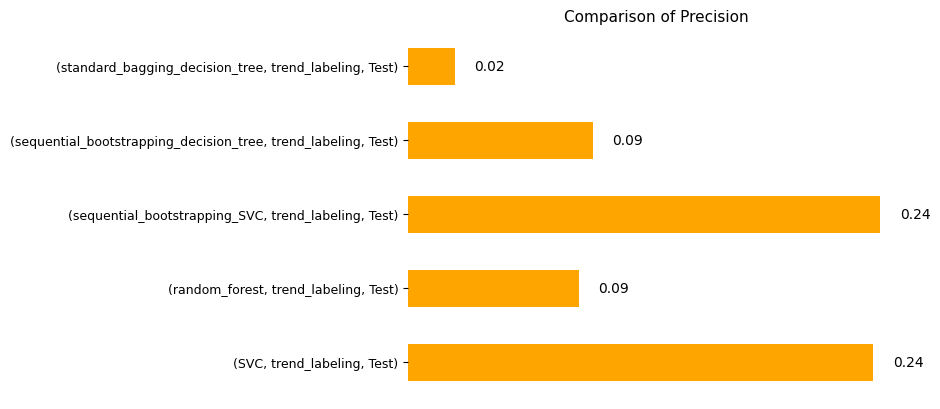

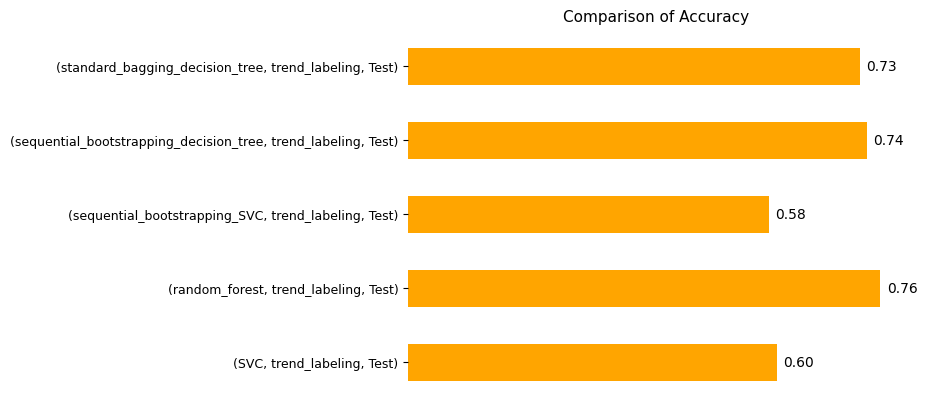

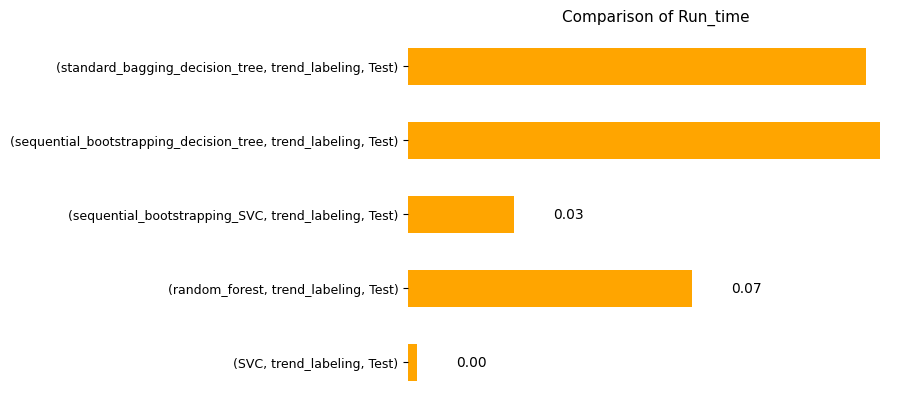

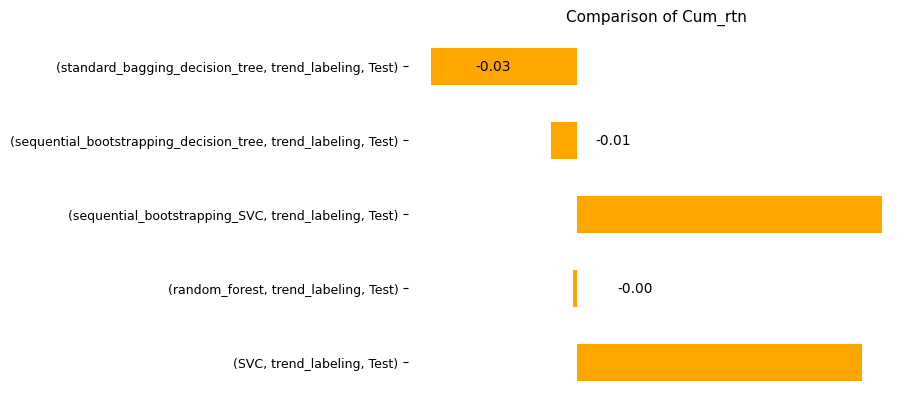

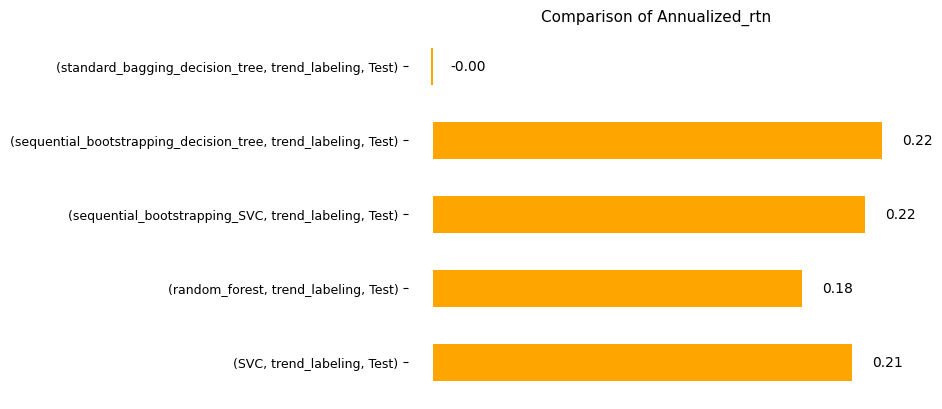

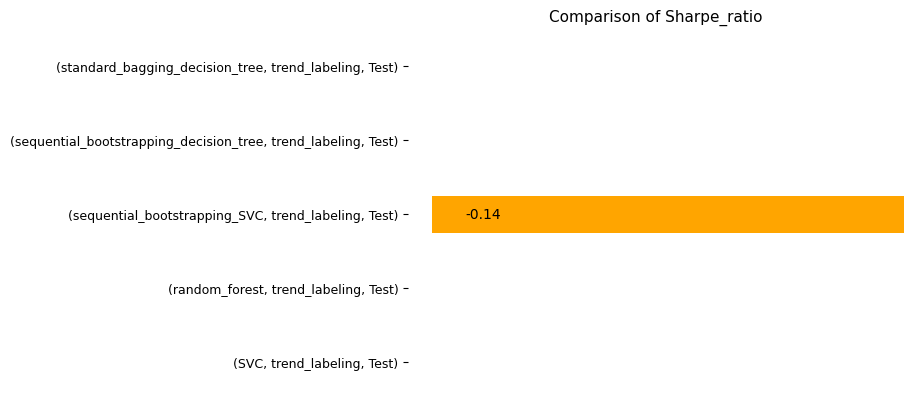

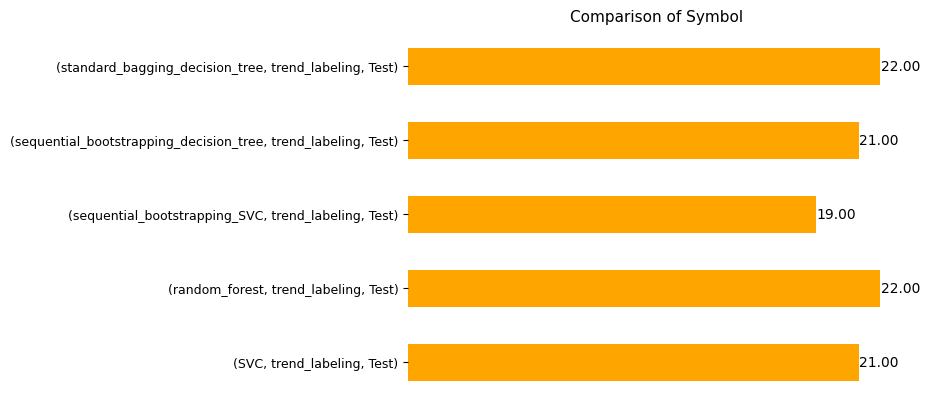

In [18]:
viz.plot_model_metrics(basket_model_metrics_tbl.loc[basket_model_metrics_tbl.index.get_level_values('train_test') ==  'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio'])


In [20]:
#basket_model_metrics_tbl.to_csv('20230412_labeling.csv')